### Mission-
Using Pinterest's public APIs to fetch data & use it to lay a quick groundwork for deriving metric for Ranking the contributors of a shared board. This rank can be used to prioritize the high quality pins & achieve the higher conversion rate.

### About Board-
Etsys-world(collaborated board): Its an online marketplace which allows indiviuals & businesses to sell their products on etsy.com


### Steps-
###  1) Getting The Data
     1.1) Public Pinterest APIs
     1.2) Limitation on API Requests 
     1.3) Data Extraction & Transformation
     1.4) Can we get Meaningfull insights?

###  2) Visualizations
     2.1) Individuals vs Business Contributors
     2.2) Pins/Pinners/Saves on timeline
     
### 3) Features
     3.1) Average daily/monthly impressions 
     3.2) Average daily/monthly viewers
     3.3) Average daily/monthly engaged 
     3.4) Contributor's Individual Feature
     3.5) Formulation
     
### 4) Conclusion & Future work
     

------------------------------------------------------------------------------------------------


### 1) About APIs
####    1.1) Public Pinterest APIs- (we have Mainly 3 Pinterest Public APIs) 
     BOARD-For Getting the information about the board & Pins on board
     PINS- Attributes of a PIN. Same information can be retrive through BOARD API endpoint'RetrievePINs'
     USERS-Information about Individual Users

#### 1.2) Limitations on API Requests
     There is Limitation on Pininterest API usage which is close to arround 1000 data requests per user becasue
     of these restricion we will only be able to analyze the past 1000 pins of the Etsy's word!

#### 1.3) Data Extraction & Transformation
     In this step we will extract the data using APIs in Json format & transform this data into pandas dataframe
     which will make our analysis queries & drawing visualizations much easier.

In [17]:
#import required libraries
import urllib2
import pandas as pd
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import json
import plotly
%matplotlib inline

board_id='551128141838483995'
key='####################################'

#### Get past 1000 pins from Board 

In [ ]:
url='https://api.pinterest.com/v1/boards/'+board_id+'/pins/?access_token='+key+'&fields=id%2Clink%2Cnote%2Curl%2Cattribution%2Cboard%2Cmedia%2Cmetadata%2Ccolor%2Ccounts%2Ccreated_at%2Coriginal_link%2Ccreator%2Cimage'
data=json.loads(urllib2.urlopen(url).read())
columns=['Pin_id','Original_link','Media_type','description','lang','title','Creator_id','Created_on','comments','saves','color','pin_width','pin_height']
ets_pins=pd.DataFrame()
count=0
while(data['page']['next']):
      
    try:
        link=data['data'][0]['original_link']
    except:
        link='none'
     
    try:
        typ=data['data'][0]['media']['type']
    except:
        typ='none'
    
    try:
        des=data['data'][0]['metadata']['link']['description']
    except:
        des='none'
        
    try:
        lan=data['data'][0]['metadata']['link']['locale']
    except:
        lan='none'
        
    try:
        title=data['data'][0]['metadata']['link']['title']
    except:
        title='none'
        
    try:
        clr=data['data'][0]['color']
    except:
        clr='none'
        
    try:
        height=data['data'][0]['image']['original']['height']
    except:
        height=0
        
    try:
        width=data['data'][0]['image']['original']['width']
    except:
        width=0
        
    temp=pd.Series([data['data'][0]['id'],link,typ,des,lan,title,data['data'][0]['creator']['id'],data['data'][0]['created_at'],data['data'][0]['counts']['comments'],data['data'][0]['counts']['saves'],clr,height,width])
    ets_pins=ets_pins.append(temp,ignore_index=True)
    url=data['page']['next']
    data=json.loads(urllib2.urlopen(url).read())
    count+=1
    if count>1000:
        break  
columns=['Pin_id','Original_link','Media_type','description','lang','title','User_id','Created_on','comments','saves','color','pin_width','pin_height']
ets_pins.columns=columns  

##### In previous step we fetched the data in JSON format from Pinterest's Board API & Stored it into Pandas DataFrame in a proper row-col form

In [52]:
ets_pins.head()

,Pin_id,Original_link,Media_type,description,lang,title,User_id,Created_on,comments,saves,color,pin_width,pin_height
0,551128073143793082,https://www.etsy.com/katerynag/listing/4673692...,image,Knit hat pattern. This bundle consists of 3 pa...,en,"Knitting pattern, knit pattern, knitting tutor...",77757668474749076,2018-04-01T21:53:46,0.0,0.0,#7d8383,380.0,570.0
1,551128073143788465,https://www.etsy.com/listing/604279047/metal-s...,image,NaN,NaN,NaN,303430231052517635,2018-04-01T14:25:45,0.0,0.0,#e3d7d7,572.0,570.0
2,551128073143782996,https://www.etsy.com/listing/480187419/spiced-...,image,Spiced Orange Body Butter ************ All Wi...,en,SPICED ORANGE LOTION | Vegan Lotion | Orange S...,226869037387219727,2018-04-01T01:27:11,0.0,0.0,#d27e37,3000.0,3000.0
3,551128073143778770,https://www.etsy.com/starringyoujewelry/listin...,image,Sterling Silver Key Necklace | Skeleton Key - ...,en,Sterling Silver Key Necklace | Skeleton Key - ...,459789580615300841,2018-03-31T17:40:10,0.0,0.0,#a79584,570.0,570.0
4,551128073143775401,https://www.etsy.com/listing/601018773/sterlin...,image,Sterling Silver Floral Filigree Bangle For yo...,en,Sterling Silver Floral Filigree Bangle,416372065457681576,2018-03-31T11:40:14,0.0,0.0,#dcdcd7,3000.0,2250.0


##### Lets have a look at what we have retrieved

In [87]:
#Remove trivial/unwanted data (only looking at past 8 months)
ets_pins['Created_on']=ets_pins['Created_on'].apply(lambda x:x[0:7])
ets_pins= ets_pins[ets_pins['Created_on']!='2013-09']
ets_pins= ets_pins[ets_pins['Created_on']!='2017-07']
ets_pins= ets_pins[ets_pins['Created_on']!='2018-04']
ets_pins=ets_pins.reset_index()
del ets_pins['index']
print("TOTAL PINS:",len(ets_pins['Pin_id']))
print("TOTAL SAVES:",len(ets_pins[ets_pins['saves']!=0]))
print("TOTAL Comments:",len(ets_pins[ets_pins['comments']!=0]))
print('Save Rate',len(ets_pins[ets_pins['saves']!=0])*1.0/len(ets_pins['Pin_id']))

('TOTAL PINS:', 964)
('TOTAL SAVES:', 33)
('TOTAL Comments:', 0)
('Save Rate', 0.03423236514522822)


#### Get All user's data who pinned on Board

In [19]:
ets_collab=pd.DataFrame()
count=0
for user_id in ets_pins['User_id'].unique():
    url='https://api.pinterest.com/v1/users/'+str(user_id)+'/?access_token='+key+'&fields=first_name%2Cid%2Clast_name%2Curl%2Caccount_type%2Cbio%2Ccounts%2Ccreated_at%2Cusername%2Cimage'
    data=json.loads(urllib2.urlopen(url).read()) 
    temp=pd.Series([data['data']['id'],data['data']['username'],data['data']['bio'],data['data']['counts']['boards'],data['data']['counts']['followers'],data['data']['counts']['following'],data['data']['counts']['pins'],data['data']['account_type']])
    ets_collab=ets_collab.append(temp,ignore_index=True)

##### In above step we have used Pinterest's User's API  to retrive data in JSON form and transformed it to be stored it in Pandas DataFrame in proper Row-Column form

In [105]:
columns=['User_id','User_name','bio','boards','followers','following','pins','account_type']
ets_collab.columns=columns
ets_collab['User_id']=ets_collab['User_id'].apply(lambda x: int(x) )
ets_collab.head()

,User_id,User_name,bio,boards,followers,following,pins,account_type
0,459789580615300841,StarringUjewel,I'm a handmade jewelry maker and only use high...,73.0,2598.0,1745.0,34253.0,business
1,416372065457681576,VintageVybe,Specializing in Vintage Goods with Positive Vi...,95.0,2040.0,3171.0,68344.0,individual
2,432416139130189865,mymugsandmore,"Making personalized mugs, astrology mugs, cute...",30.0,2943.0,8548.0,14235.0,business
3,95983173216766571,crochandi,NaN,78.0,773.0,258.0,50376.0,individual
4,403987166482430057,najljepi,"Hand Embroidery Hoop Art, I create Modern Embr...",81.0,5605.0,4285.0,20860.0,business


### 1.4) Can we get Meaningfull insights?
     Yes! we can but for best analysis we would following data
     1) Impressions / views / clicks  on each pins of board
     2) All the pins & Impressions / views / clicks rate of contributor's previous pins
     3) Network of contributors (How they are connected with each other through pins or boards)
     

### 2) Visualizations
####  2.1) Individuals vs Business Contributors

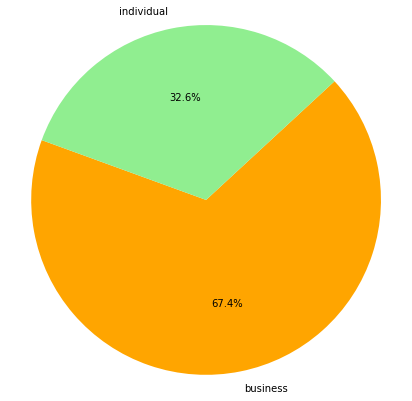

In [117]:
fig = plt.gcf()
fig.set_size_inches(7, 7)
ets_data=ets_pins.merge(ets_collab,on=['User_id'],how='inner')
val=ets_data.groupby(['account_type']).size().values
labels=ets_data.groupby(['account_type']).size().index
plt.pie(val,labels = labels, colors=['orange','lightgreen'], autopct='%1.1f%%', startangle=520) 
plt.axis('equal')
plt.show()

Most of the pinner's on this board are holding business account with Pinterest

#### 2.2) Pins/Pinners/Saves on timeline

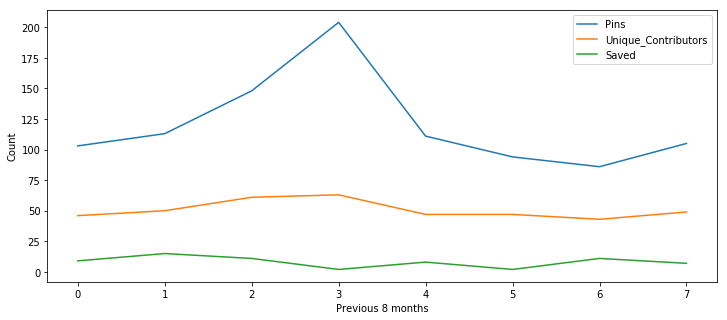

In [118]:
fig = plt.gcf()
fig.set_size_inches(12, 5)
X=ets_pins.groupby(['Created_on']).size().index
Y=ets_pins.groupby(['Created_on']).size().values
Q=ets_pins.groupby('Created_on').User_id.nunique().values
B=ets_pins.groupby('Created_on').saves.sum().values
# Create traces
plt.plot(Y,label="Pins")
plt.plot(Q,label='Unique_Contributors')
plt.plot(B,label='Saved')
plt.xlabel('Previous 8 months')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.close()

Interesting on month 3 (Nov-2017) we had most unique pinners & pins on the board but least Saves!! It would be nice to have a look at these pins & check what trigger a user to save a pin

### 3) Features
####     3.1) Pins to Save Ratio
##### If a contributor posting many pins but producing very less saves or other impressions then we can not say that contributor is adding much value to the board where as if a contributor is pining just a few high quality pins but getting more saves such contributors are more valuable to the board & should be give priority in shared board.

In [122]:
e=[]
temp=pd.DataFrame(columns=['User_id','Pin_count'])
temp['User_id']=ets_pins.groupby(['User_id']).size().index
temp['Pin_count']=ets_pins.groupby(['User_id']).size().values
#temp=temp.sort_values(by=['Pin_count'],ascending=False).reset_index()
for user in temp['User_id']:
    k=ets_pins[ets_pins['User_id']==int(user)]
    e.append(k['saves'].sum())
temp['saves']=e
temp['save_ratio']=temp['saves']/temp['Pin_count']*100
temp=temp.sort_values(by=['save_ratio'],ascending=False).reset_index()
del temp['index']
temp.head(25)

,User_id,Pin_count,saves,save_ratio
0,107734753494436549,1,9.0,900.000000
1,202943664366813278,1,3.0,300.000000
2,551128210557901855,6,9.0,150.000000
3,376472987508953998,7,10.0,142.857143
4,97601654332851882,3,3.0,100.000000
5,527484312514208264,1,1.0,100.000000
6,91549942333572665,1,1.0,100.000000
7,102105253960221601,3,2.0,66.666667
8,339670134304015595,5,3.0,60.000000
9,354025358116274257,2,1.0,50.000000


### 3.2) Average daily/monthly impressions  
        APIs do not provide this data publicly for any user but it is a very important feture for our Rank formula
### 3.3) Average daily/monthly viewers
        APIs do not provide this data publicly for any user but it is a very important feture for our Rank formula
### 3.4) Average daily/monthly engaged
        APIs do not provide this data publicly for any user but it is a very important feture for our Rank formula

### 3.4) Contributors Individual Features
##### Followers: 
This is another very important feaure because if contributor has more number of followers then the pins by this user on the shared board will induce traffic on board.

##### PIN: 
Total number of pins by contributor. to many pins but less engagement/impressions/clicks might indicate towards poor quality of pins

##### BOARD: 
Following too many boards is indicator that user is contributing to many boards & might not be producing quality pins or putting redundant pins on multiple shared boards, so we need look for user's average engagement/impressions/clicks rates.

#### Comments & Reply:
We got comment number of all the pins but they are 0 so we will not be considering this feature for now

In [123]:
pins=[]
follower=[]
board=[]
for user in temp['User_id']:
    pins.append(int(ets_collab[ets_collab['User_id']==user]['pins']))
    follower.append(int(ets_collab[ets_collab['User_id']==user]['followers']))
    board.append(int(ets_collab[ets_collab['User_id']==user]['boards']))
temp['pins']=pins
temp['followers']=follower
temp['board']=board

#### Below are the features that 'we were able to extract for each of the contributor'

In [124]:
temp.head(20)

,User_id,Pin_count,saves,save_ratio,pins,followers,board
0,107734753494436549,1,9.0,900.000000,2058,671,31
1,202943664366813278,1,3.0,300.000000,3933,667,45
2,551128210557901855,6,9.0,150.000000,35099,12823,54
3,376472987508953998,7,10.0,142.857143,23002,1263,129
4,97601654332851882,3,3.0,100.000000,38311,9693,88
5,527484312514208264,1,1.0,100.000000,24112,2554,60
6,91549942333572665,1,1.0,100.000000,13930,2430,49
7,102105253960221601,3,2.0,66.666667,19239,8315,105
8,339670134304015595,5,3.0,60.000000,4703,340,101
9,354025358116274257,2,1.0,50.000000,15752,1576,69


### 3.5) Formulation
To create a Rank formula we need to normalize and assign positive or negative weights for each of the features.
where features are 'save ratio','avg. engagment','avg impression', 'followers'etc. and finally take a weighted sum to determine the Rank of a user/contributor.

#### Rank= w0*f0 + w1*f1 + w2*f2 -w3*f3 +..................

-----------------------------------------------------------------------
    

### 4) Conclusion & Future Work

We layed the groundwork for "Calcuating the Rank of contributor on a shared board" but couldn't apply the formula because some very important features were missing due to API's restrictions.

For Future work we can think about:
##### new features- that could give us the indication of Pin Quality/ Contributor's strenghts.
##### Visualization- More insightful visuals can be created with new & existing data
##### Data- we would also need to get data related to consumer interaction(impressions/clicks etc.) on PINs by contributors. If we get this data then we can construct our remaining features & calculate better Ranking Forumla.